# MNIST Handwritten Digits ANN
This notebook contains an implementation of the network alluded to in Section 5 (the conclusion) of _"From Matrices to Models."_ It is trained to recognize handwritten digits. Each image of a handwritten digit (grayscale) is converted into a list of values between 0 and 1—each pixel of the image (an entry) holds its color.

We begin by importing all the libraries we'll need for this network.

In [2]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Next, we load and reshape the data, and convert the labels to one-hot encoding (there will be 10 nodes on the output layer, and this tells the network that the most active (value closest to one) node is the prediction).

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize the images to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape data to (num_samples, 28, 28, 1) for compatibility with Conv2D layer (even though we are using Dense layers)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

Now, we define the model itself, made up of 5 layers:
- Input Layer: $\mathbb{R}^{28 \times 28}$
- Second Layer (Flatten Layer): $T_1 : \mathbb{R}^{28 \times 28} \rightarrow \mathbb{R}^{784}$ [This layer converts the 2D image into a 1D vector].
- Third Layer (Dense Layer): $T_2 : \mathbb{R}^{784} \rightarrow \mathbb{R}^{128}$ [This layer narrows down the number of neurons to move toward an output].
- Fourth Layer (Dropout Layer): $T_3 : \mathbb{R}^{128} \rightarrow \mathbb{R}^{128}$ [This layer sets a fraction of the inputs to zero and helps to prevent overfitting].
- Fifth Layer (Output Layer) $T_4 : \mathbb{R}^{128} \rightarrow \mathbb{R}^{10}$ [The node with the greatest value is the network's prediction (nodes labeled 0–9)].

In [4]:
# Define the model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the image to a 1D vector
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),  # Hidden layer
    layers.Dropout(0.2),  # Dropout layer to avoid overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/Users/test/Development/Lafayette/MATH 272/From Matrices to Models/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Next, we compile, train, and test the model.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8430 - loss: 0.5355 - val_accuracy: 0.9552 - val_loss: 0.1628
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9510 - loss: 0.1669 - val_accuracy: 0.9657 - val_loss: 0.1163
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1201 - val_accuracy: 0.9693 - val_loss: 0.0996
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9705 - loss: 0.0979 - val_accuracy: 0.9717 - val_loss: 0.0934
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9762 - loss: 0.0793 - val_accuracy: 0.9737 - val_loss: 0.0865
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0668 - val_accuracy: 0.9762 - val_loss: 0.0800
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0603 - val_accuracy: 0.9749 - val_loss: 0.0862
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0540 - 

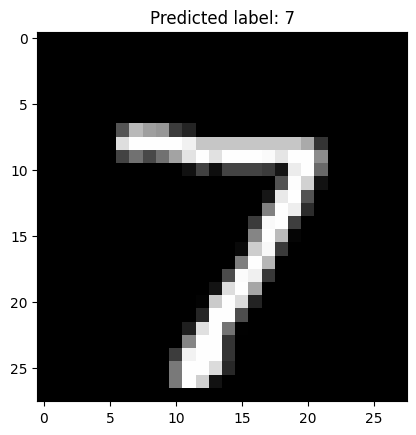

In [5]:
# Compile the model
model.compile(
    optimizer='adam',              # Adam optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']            # Monitor accuracy during training
)

# Train the model
history = model.fit(
    X_train,        # Training data
    y_train,        # Training labels
    epochs=10,      # Number of epochs
    batch_size=32,  # Batch size
    validation_split=0.2  # Split off 20% of training data for validation
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(X_test)

# Show the first test image and its predicted label

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted label: {np.argmax(predictions[0])}")
plt.show()